# Survival Tree in Python

In [1]:
!pip install scikit-survival

     ------------------------------------ 709.1/709.1 kB 770.5 kB/s eta 0:00:00
     ------------------------------------ 292.5/292.5 kB 392.6 kB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 792.2 kB/s eta 0:00:00
     -------------------------------------- 92.7/92.7 kB 441.2 kB/s eta 0:00:00
     -------------------------------------- 83.1/83.1 kB 774.6 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install eli5

     ------------------------------------ 216.2/216.2 kB 280.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
  Running setup.py install for eli5: started
  Running setup.py install for eli5: finished with status 'done'


  DEPRECATION: eli5 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Import libraries, importdata, andfit a model
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.tree import SurvivalTree

In [7]:
X, y = load_whas500()
X = X.astype(float)
estimator = SurvivalTree().fit(X, y)

In [8]:
url = '/content/drive/MyDrive/Dataset/Assignment/605/export.py'

[Text(338.8956953642384, 358.04999999999995, 'age <= 85.5\nsamples = 500\nvalue = '),
 Text(222.85099337748343, 334.95, 'chf <= 0.5\nsamples = 433\nvalue = '),
 Text(115.58278145695364, 311.84999999999997, 'age <= 72.5\nsamples = 315\nvalue = '),
 Text(42.70198675496689, 288.75, 'sysbp <= 85.0\nsamples = 204\nvalue = '),
 Text(36.132450331125824, 265.65, 'samples = 5\nvalue = '),
 Text(49.271523178807946, 265.65, 'hr <= 126.5\nsamples = 199\nvalue = '),
 Text(42.70198675496689, 242.54999999999998, 'hr <= 79.5\nsamples = 194\nvalue = '),
 Text(26.278145695364238, 219.45, 'age <= 70.5\nsamples = 103\nvalue = '),
 Text(13.139072847682119, 196.35, 'sysbp <= 168.5\nsamples = 97\nvalue = '),
 Text(6.569536423841059, 173.24999999999997, 'samples = 76\nvalue = '),
 Text(19.70860927152318, 173.24999999999997, 'sysbp <= 175.0\nsamples = 21\nvalue = '),
 Text(13.139072847682119, 150.14999999999998, 'bmi <= 27.677\nsamples = 7\nvalue = '),
 Text(6.569536423841059, 127.04999999999998, 'samples = 3\

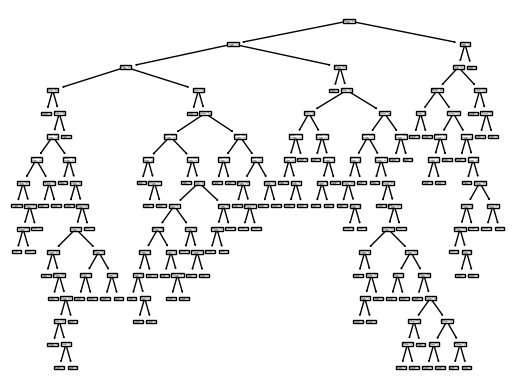

In [9]:
#plot survival tree
import sys
sys.path.append(url)
import export as export
export.plot_tree(estimator,
feature_names=estimator.feature_names_in_,
impurity=False,
)

In [10]:
predict_outcomes = estimator.predict(X)

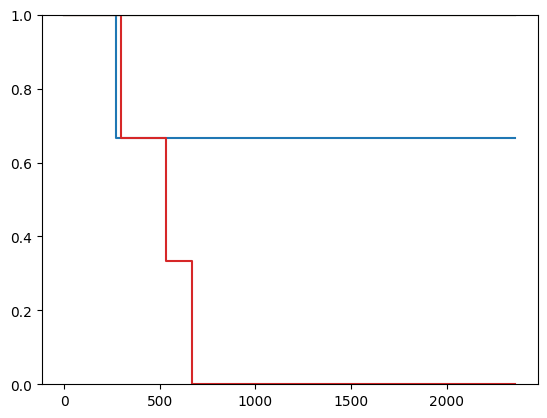

In [16]:
#Estimatethesurvival function for thefirst 5samples..
surv_funcs = estimator.predict_survival_function(X.iloc[:5])
#Plot theestimatedsurvival functions
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.show()

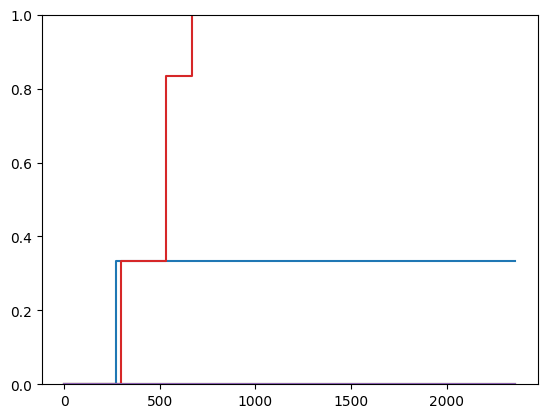

In [17]:
#Estimatethecumulativehazard functionfor thefirst 5samples.
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])
#Plot theestimatedcumulativehazard functions
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.show()

# Random Survival Forests

In [18]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

In [37]:
#loaddataset
X,y = load_gbsg2()
X

,age,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize
0,70.0,66.0,no,Post,3.0,48.0,II,21.0
1,56.0,77.0,yes,Post,7.0,61.0,II,12.0
2,58.0,271.0,yes,Post,9.0,52.0,II,35.0
3,59.0,29.0,yes,Post,4.0,60.0,II,17.0
4,73.0,65.0,no,Post,1.0,26.0,II,35.0
...,...,...,...,...,...,...,...,...
681,49.0,84.0,no,Pre,3.0,1.0,III,30.0
682,53.0,0.0,yes,Post,17.0,0.0,III,25.0
683,51.0,0.0,no,Pre,5.0,43.0,III,25.0
684,52.0,34.0,no,Post,3.0,15.0,II,23.0


In [39]:
y

array([( True, 1814.), ( True, 2018.), ( True,  712.), ( True, 1807.),
       ( True,  772.), ( True,  448.), (False, 2172.), (False, 2161.),
       ( True,  471.), (False, 2014.), ( True,  577.), ( True,  184.),
       (False, 1840.), (False, 1842.), (False, 1821.), ( True, 1371.),
       ( True,  707.), (False, 1743.), (False, 1781.), ( True,  865.),
       ( True, 1684.), (False, 1701.), (False, 1701.), (False, 1693.),
       ( True,  379.), ( True, 1105.), ( True,  548.), ( True, 1296.),
       (False, 1483.), (False, 1570.), (False, 1469.), (False, 1472.),
       (False, 1342.), (False, 1349.), ( True, 1162.), (False, 1342.),
       ( True,  797.), (False, 1232.), (False, 1230.), (False, 1205.),
       (False, 1090.), (False, 1095.), ( True,  449.), (False,  972.),
       (False,  825.), (False, 2438.), (False, 2233.), ( True,  286.),
       (False, 1861.), ( True, 1080.), ( True, 1521.), (False, 1693.),
       ( True, 1528.), ( True,  169.), ( True,  272.), ( True,  731.),
      

In [40]:
from sksurv.util import Surv
y2 = X[["cens", "time"]]
y2["cens"] = y2["cens"].astype(bool)
y2 = Surv.from_dataframe("cens","time",y2)

KeyError: "None of [Index(['cens', 'time'], dtype='object')] are in the [columns]"

### Datapreparing:

In [21]:
#loadthedataandtransform it intonumericvalues
grade_str = X.loc[:, "tgrade"].astype(object).values[:,np.newaxis]

In [22]:
#loadthedataandtransform it intonumericvalues
grade_num = OrdinalEncoder(categories=[["I", "II", "III"]]).fit_transform(grade_str)

In [23]:
#loadthedataandtransform it intonumericvalues
X_no_grade = X.drop("tgrade",axis=1)

In [24]:
#loadthedataandtransform it intonumericvalues
Xt = OneHotEncoder().fit_transform(X_no_grade)
Xt.loc[:, "tgrade"] = grade_num

In [25]:
#thedataissplit into75% for trainingand25% for testing
random_state = 20
X_train, X_test,y_train,y_test = train_test_split(Xt, y, test_size=0.25, random_state=random_state)

In [26]:
#Training
rsf = RandomSurvivalForest(n_estimators=1000,
min_samples_split=10,
min_samples_leaf=15,
max_features="sqrt",
n_jobs=-1,
random_state=random_state)
rsf.fit(X_train,y_train)
#check how well the modelperformsbyevaluatingitonthetestdata.
rsf.score(X_test, y_test)

0.6759696016771488

In [27]:
#Predicting
#Let’s firstselect acoupleofpatients from thetestdataaccordingtothenumberofpositivelymphnodes andage
X_test_sorted = X_test.sort_values(by=["pnodes", "age"])
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))
X_test_sel

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tsize,tgrade
119,33.0,0.0,0.0,0.0,1.0,26.0,35.0,2.0
574,34.0,37.0,0.0,0.0,1.0,0.0,40.0,2.0
421,36.0,14.0,0.0,0.0,1.0,76.0,36.0,1.0
24,65.0,64.0,0.0,1.0,26.0,2.0,70.0,2.0
8,80.0,59.0,0.0,1.0,30.0,0.0,39.0,1.0
226,72.0,1091.0,1.0,1.0,36.0,2.0,34.0,2.0


In [28]:
#The predicted risk scores indicate that risk for the last three patients is quite a bit higher than that of the first three patients.
pd.Series(rsf.predict(X_test_sel))

0     91.477609
1    102.897552
2     75.883786
3    170.502092
4    171.210066
5    148.691835
dtype: float64

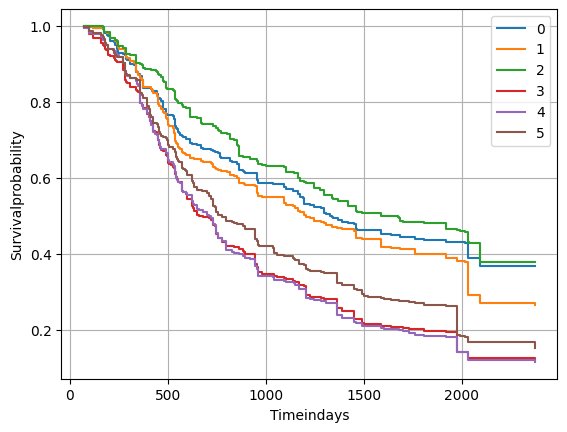

In [31]:
#Plot survivalcurve
surv = rsf.predict_survival_function(X_test_sel, return_array=True)
for i,s in enumerate(surv):
    plt.step(rsf.event_times_,s, where="post", label=str(i))
plt.ylabel("Survivalprobability")
plt.xlabel("Timeindays")
plt.legend()
plt.grid(True)

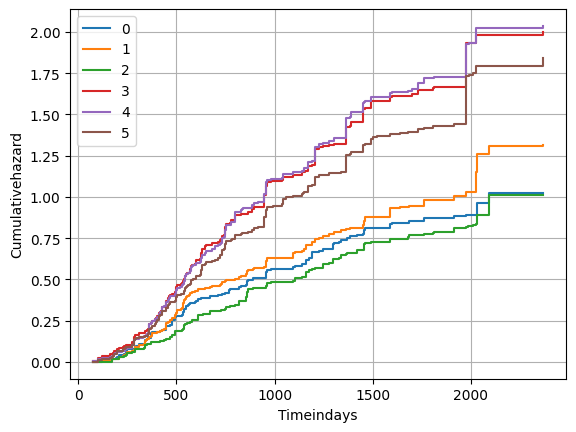

In [32]:
#plot thepredictedcumulativehazardfunction.
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)
for i,s in enumerate(surv):
    plt.step(rsf.event_times_,s, where="post", label=str(i))
plt.ylabel("Cumulativehazard")
plt.xlabel("Timeindays")
plt.legend()
plt.grid(True)